In [ ]:
!pip install plotly==3.10.0
from chart_studio import plotly

     |████████████████████████████████| 41.5 MB 1.3 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=2387ad8cd362737e8e4839616a556a5f11aa41df2b46b13f9d2a6e8e41758f2e
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cufflinks 0.17.3 requires plotly>=4.1.1, but you have plotly 3.10.0 which is incompatible.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.gridspec import GridSpec

import warnings
warnings.filterwarnings("ignore")
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


In [ ]:
df = pd.read_csv("/content/bank-additional-full.csv", sep = ";")
df = df.drop_duplicates(keep='first')
df = df.loc[:,~df.columns.duplicated()]
df.shape

(41176, 21)

# Tổng quan về dữ liệu

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
for col in df.select_dtypes(include='object').columns:
  print(col)
  print(df[col].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']
y
['no' 'yes']


In [ ]:
# Job type has a value 'admin.'. Changing it into 'admin'
df['job'] = df['job'].str.replace('admin.','admin')

# Changing 'nonexistent' in poutcome to 'unknown' to match the syntax of the rest of the data
df['poutcome'] = df['poutcome'].str.replace('nonexistent','unknown')

**Nhận xét 1:** Dataset có 41176 dữ liệu với 21 feature. Chia thành 3 loại feature (ghép phần dictionary của Nghĩa):
* Personal data
* Bank data
* Macro data


**Nhận xét 2**: Trong loại dữ liệu categorical, có giá trị unknow

**Nhận xét 3:** Đa số các khách hàng không được liên lạc từ campain trước do mean previous là 0.17

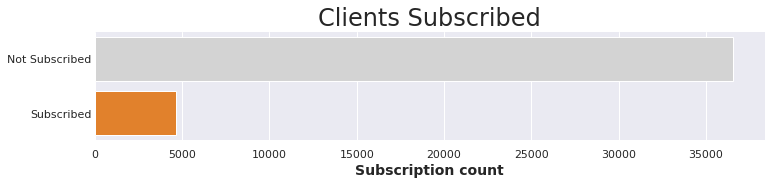

In [ ]:
data_subscription_grouped = df.groupby('conversion').count()[['age']].reset_index()
data_subscription_grouped['conversion'] = data_subscription_grouped['conversion'].astype('str').str.replace('0','Not Subscribed')
data_subscription_grouped['conversion'] = data_subscription_grouped['conversion'].astype('str').str.replace('1','Subscribed')

custom_palette = ['lightgrey', 'tab:orange']

fig, ax = plt.subplots(figsize=(12,2))
sns.barplot(ax = ax, data=data_subscription_grouped, y='conversion',x='age', palette = custom_palette)
ax.set_title('Clients Subscribed', fontsize=24)
ax.set_ylabel('', fontweight='bold', fontsize=14)
ax.set_xlabel('Subscription count', fontweight='bold', fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='y', which='both', length=0)

plt.show()

**Nhận xét:** Đa số các cuộc gọi của nghiên hàng đều có kết quả là not subcribed

In [ ]:
df2 = df.copy()

# Insight trong phần Requirement

## Độ tuổi có ảnh hưởng đến tỷ lệ chuyển đổi hay không ?

In [ ]:
df['conversion'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [ ]:
pd.DataFrame(
    df.groupby(
        by='age'
    )['conversion'].sum()
)

,conversion
age,
17,2
18,12
19,20
20,23
21,29
...,...
91,0
92,3
94,0


In [ ]:
pd.DataFrame(
    df.groupby(
        by='age'
    )['conversion'].count()
)

,conversion
age,
17,5
18,28
19,42
20,65
21,102
...,...
91,2
92,4
94,1


In [ ]:
conversions_by_age = df.groupby(
    by='age'
)['conversion'].sum() / df.groupby(
    by='age'
)['conversion'].count() * 100.0

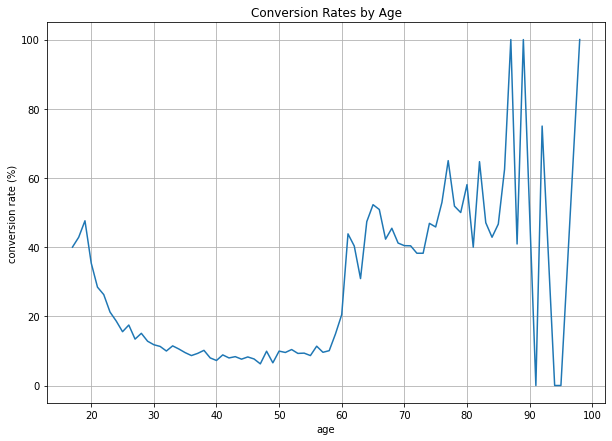

In [ ]:
ax = conversions_by_age.plot(
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Age'
)

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

**Nhận xét:** Có nhiều noise ở nhóm độ tuổi cao. Tỷ lệ chuyển đổi của nhóm trên 70 tuổi biến động rất nhiều ( lý do: dữ liệu nhóm tuổi này rất ít so với các nhóm tuổi khác)

In [ ]:
#group tuổi để visual
df['age_group'] = df['age'].apply(
    lambda x: '[17, 30)' if x < 30 else '[30, 40)' if x < 40 \
        else '[40, 50)' if x < 50 else '[50, 60)' if x < 60 \
        else '[60, 70)' if x < 70 else '70+'
)

In [ ]:
pd.DataFrame(
    df.groupby(
        by='age_group'
    )['conversion'].sum()
)

,conversion
age_group,
70+,221
"[17, 30)",922
"[30, 40)",1715
"[40, 50)",833
"[50, 60)",697
"[60, 70)",251


In [ ]:
pd.DataFrame(
    df.groupby(
        by='age_group'
    )['conversion'].count()
)

,conversion
age_group,
70+,468
"[17, 30)",5667
"[30, 40)",16933
"[40, 50)",10523
"[50, 60)",6861
"[60, 70)",724


In [ ]:
conversions_by_age_group = df.groupby(
    by='age_group'
)['conversion'].sum() / df.groupby(
    by='age_group'
)['conversion'].count() * 100.0

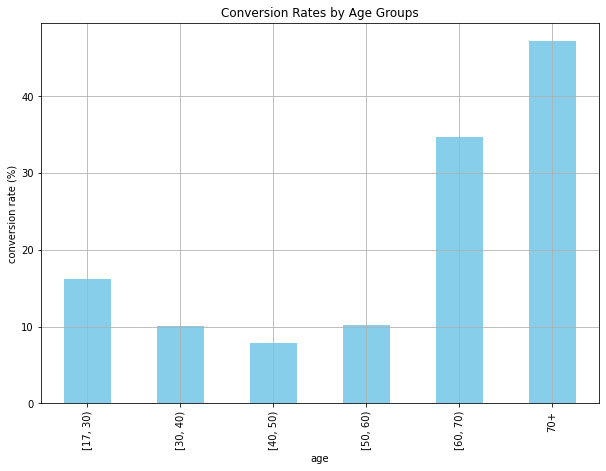

In [ ]:
ax = conversions_by_age_group.loc[
    ['[17, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
    kind='bar',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Age Groups'
)

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

**Nhận xét:** Tỷ lệ chuyển đổi của nhóm khách hàng dưỡi 30 tuổi và trên 60 tuổi cao hơn các nhóm khách hàng khác, đặc biệt là nhóm khách hàng trên 60 tuổi => Độ tuổi có ảnh hưởng đến tỷ lệ chuyển đổi

## Tình trạng hôn nhân có ảnh hướng đến conversion rate hay không ?

In [ ]:
conversions_by_marital_status_df = pd.pivot_table(df, values='y', index='marital', columns='conversion', aggfunc=len)
conversions_by_marital_status_df.columns = ['non_conversions', 'conversions']

In [ ]:
conversions_by_marital_status_df

,non_conversions,conversions
marital,,
divorced,4135,476
married,22390,2531
single,9944,1620
unknown,68,12


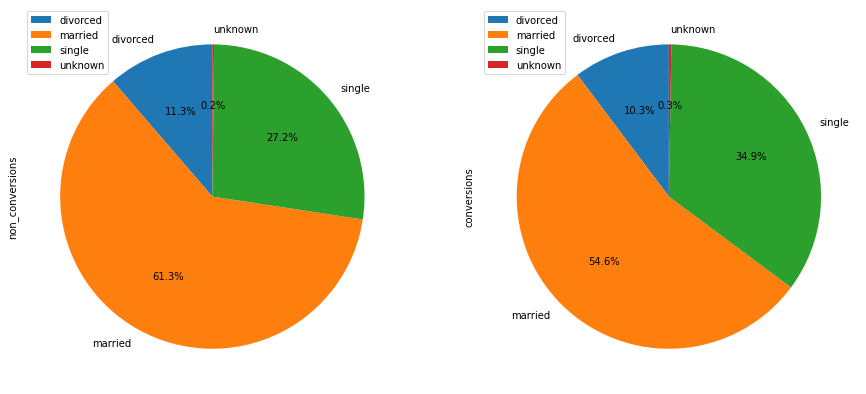

In [ ]:
conversions_by_marital_status_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

**Nhận xét:** Trong tỷ lệ chuyển đổi và không chuyển đổi, nhóm khách hàng đã kết hôn đều chiếm tỷ lệ cao nhất, sau đó đến single và cuối cùng và divorced => Tình trạng hôn nhân không ảnh hưởng đén tỷ lẹ chuyển đổi.

## Số contact ở các chiến dịch trước có ảnh hưởng đến tỷ lệ chuyển đổi hay không ?

In [ ]:
pd.DataFrame(
    df.groupby(
        by='campaign'
    )['conversion'].sum()
)

,conversion
campaign,
1,2299
2,1211
3,574
4,249
5,120
6,75
7,38
8,17
9,17


In [ ]:
pd.DataFrame(
    df.groupby(
        by='campaign'
    )['conversion'].count()
)

,conversion
campaign,
1,17634
2,10568
3,5340
4,2650
5,1599
6,979
7,629
8,400
9,283


In [ ]:
conversions_by_contacts = df.groupby(
    by='campaign'
)['conversion'].sum() / df.groupby(
    by='campaign'
)['conversion'].count() * 100.0

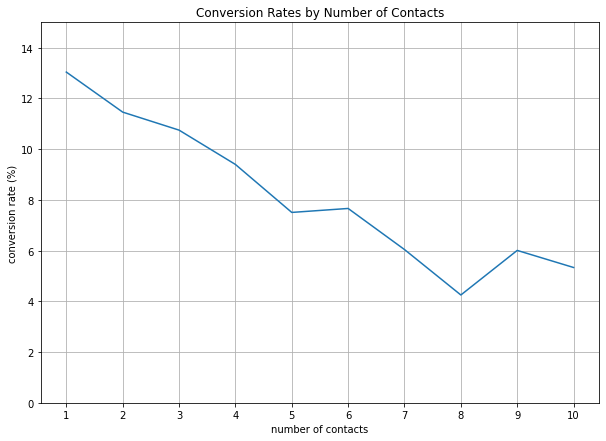

In [ ]:
ax = conversions_by_contacts[:10].plot(
    grid=True,
    figsize=(10, 7),
    xticks=conversions_by_contacts.index[:10],
    title='Conversion Rates by Number of Contacts'
)

ax.set_ylim([0, 15])
ax.set_xlabel('number of contacts')
ax.set_ylabel('conversion rate (%)')

plt.show()

**Nhận xét:** Số contact của campaign trước tỷ lệ ngịch với tỷ lệ chuyển đổi. Số lần gọi càng lớn thì tỷ lệ chuyển đổi càng thấp. => Không nên gọi nhiều hơn 3 cuộc gọi cho cùng 1 khách hàng để tiết kiệm thời gian và effort. 

## Học vấn có ảnh hưởng đến tỷ lệ chuyển đổi hay không ?

In [ ]:
conversions_by_education_df = pd.pivot_table(df, values='y', index='education', columns='conversion', aggfunc=len)
conversions_by_education_df.columns = ['non_conversions', 'conversions']

In [ ]:
conversions_by_education_df

,non_conversions,conversions
education,,
basic.4y,3748,428
basic.6y,2103,188
basic.9y,5572,473
high.school,8481,1031
illiterate,14,4
professional.course,4645,595
university.degree,10495,1669
unknown,1479,251


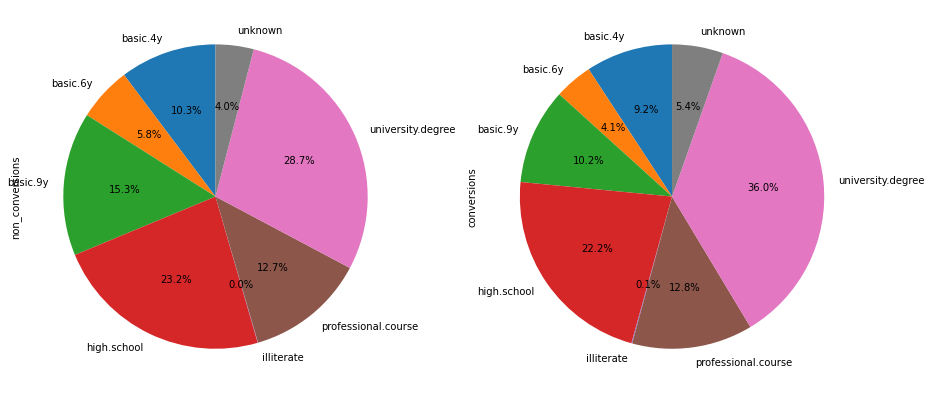

In [ ]:
conversions_by_education_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x,
    legend=False
)

plt.show()

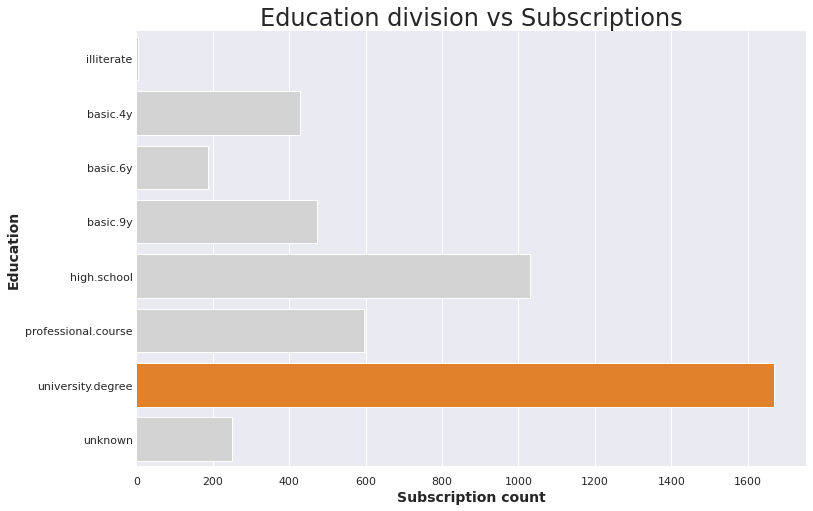

In [ ]:
data_education_grouped = df.groupby(['education', 'conversion']).count()[['age']].reset_index()
education_df = pd.DataFrame({'education': ['illiterate','basic.4y','basic.6y','basic.9y','high.school','professional.course','university.degree','unknown']})
education_df = education_df.reset_index().set_index('education')
data_education_grouped['education_index'] = data_education_grouped['education'].map(education_df['index'])
data_education_grouped = data_education_grouped.sort_values(by='education_index')

custom_palette = ['lightgrey']*7
custom_palette.insert(6, 'tab:orange')

fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(ax = ax, data=data_education_grouped[data_education_grouped['conversion'] == 1], y='education',x='age', palette = custom_palette)
ax.set_title('Education division vs Subscriptions', fontsize=24)
ax.set_ylabel('Education', fontweight='bold', fontsize=14)
ax.set_xlabel('Subscription count', fontweight='bold', fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='y', which='both', length=0)

plt.show()

**Nhận xét:** 
*  Nhóm khách hàng có bằng đại học và high school đều chiếm tỷ lệ cao trong việc chuyển đổi và không chuyển đổi. 
*  Trong nhóm khách hàng đồng ý mở tài khoản, nhóm người có bằng đại học chiếm tỷ lệ cao, tiếp đó đến high.school, professional course => Người với học vấn cáo dường như sẽ có tỷ lệ chuyển đổi cao.

## Độ dài cuộc gọi trước có ảnh hưởng đến tỷ lệ chuyển đổi hay không ?

In [ ]:
df.groupby('conversion')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
conversion,,,,,,,,
0,36537.0,220.868079,207.116178,0.0,95.0,164.0,279.0,4918.0
1,4639.0,553.256090,401.190736,37.0,253.5,449.0,741.5,4199.0


In [ ]:
duration_df = pd.concat([
    df.loc[df['conversion'] == 1, 'duration'].reset_index(drop=True), 
    df.loc[df['conversion'] == 0, 'duration'].reset_index(drop=True)
], axis=1)

duration_df.columns = ['conversions', 'non_conversions']

duration_df = duration_df / (60)
duration_df

,conversions,non_conversions
0,26.250000,4.350000
1,17.366667,2.483333
2,24.450000,3.766667
3,9.650000,2.516667
4,7.683333,5.116667
...,...,...
36532,NaN,4.233333
36533,NaN,1.866667
36534,NaN,6.383333
36535,NaN,3.150000


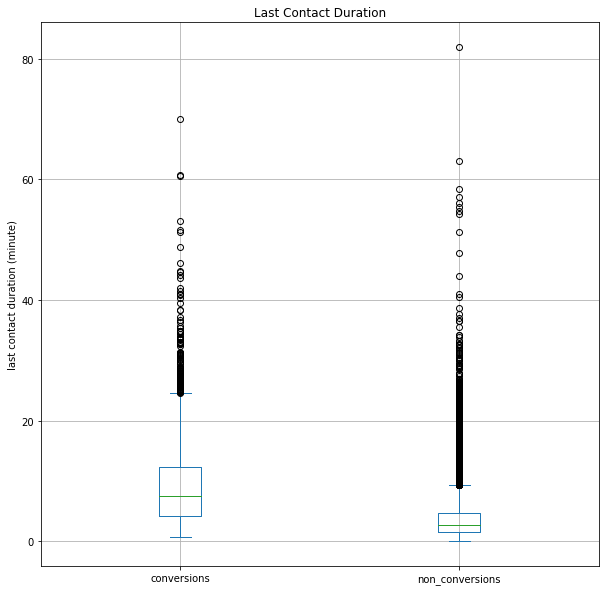

In [ ]:
ax = duration_df.plot(
    kind='box',
    grid=True,
    figsize=(10, 10),
)

ax.set_ylabel('last contact duration (minute)')
ax.set_title('Last Contact Duration')

plt.show()

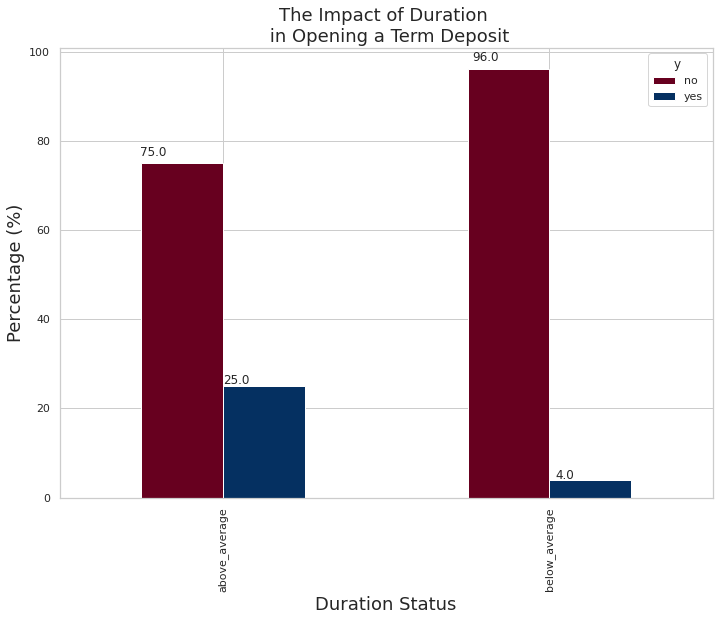

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
avg_duration = df['duration'].mean()

lst = [df]
df["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"
    
pct_term = pd.crosstab(df['duration_status'], df['y']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=18)
plt.xlabel("Duration Status", fontsize=18);
plt.ylabel("Percentage (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    

plt.show()

**Nhận xét:** Tỷ lệ chuyển đổi của của những khách hàng có độ dài cuộc gọi trên trung bình cao hơn rất nhiều so với những khách hàng có độ dài dưới trung bình. Những khách hàng đồng ý đăng ký deposit thường có cuộc gọi kéo dài từ 7-12p trong khi những khách hàng không đồng ý thường có cuộc gọi kéo dài dưới 7 phút. => Tìm cách mở rộng cuộc gọi khách hàng ( đặt câu hỏi, xin thông tin,..)

## Công việc có ảnh hưởng đến tỷ lệ chuyển đổi không ?

In [ ]:
conversions_by_job_df = pd.pivot_table(df, values='y', index='job', columns='conversion', aggfunc=len)
conversions_by_job_df.columns = ['non_conversions', 'conversions']
conversions_by_job_df

,non_conversions,conversions
job,,
admin.,9068,1351
blue-collar,8615,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1284,434
self-employed,1272,149
services,3644,323
student,600,275


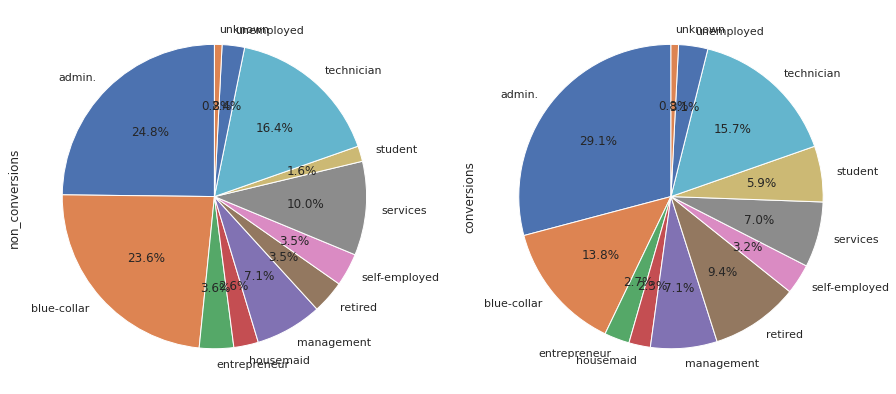

In [ ]:
conversions_by_job_df.plot(
    kind='pie',
    figsize=(15, 10),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x,
    legend=False
)

plt.show()

**Nhận xét:** Tỷ lệ các ngành nghề khá tương xứng giữa non_conversion group và conversion group. Tuy nhiên, nhóm nghề Blue-collar có tỷ lệ KHÔNG chuyển đổi cao vượt trội khi so sánh với tỷ lệ chuyển đổi. Thêm vào đó, nhóm student và retired có tỷ lệ chuyển đổi cao so với tỷ lệ không chuyển đổi => Kết hợp với kết luận ở nhóm tuổi thì điều này hoàn toàn hợp lý.
*  Retired group ( trên 60 tuổi) có xu hướng đồng ý mở tài khoản deposit để kiếm tiền từ lãi xuất => Xác định nhóm khách hàng tiềm năng

## Chúng ta nên contact với khách hàng vào thời gian nào ?

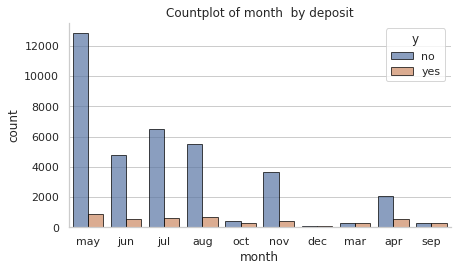

In [ ]:
plt.figure(figsize=[12,14])
features=["month"]
n=1
for f in features:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='y', edgecolor="black", alpha=0.7, data=df)
    sns.despine()
    plt.title("Countplot of {}  by deposit".format(f))
    n=n+1
plt.tight_layout()
plt.show()

**Nhận xét:** Tháng 5 là tháng có tỷ lệ reject cao nhất, sau đó là tháng  6,7,8. Các tháng có tỷ lệ reject thấp là tháng 9,10,12 => Tính mùa vụ: Khách hàng có xu hướng mở tài khoản deposit vào mùa thu đông 

## Chúng ta nên chọn loại contact nào ?

# Insight khác 

## Độ tuổi và tình trạng hôn nhân

In [ ]:
age_marital_df = df.groupby(['age_group', 'marital'])['conversion'].sum().unstack('marital').fillna(0)
age_marital_df = age_marital_df.divide(
    df.groupby(
        by='age_group'
    )['conversion'].count(), 
    axis=0
)
age_marital_df

marital,divorced,married,single,unknown
age_group,,,,
70+,0.136752,0.322650,0.012821,0.000000
"[17, 30)",0.002118,0.027881,0.132522,0.000176
"[30, 40)",0.007559,0.052973,0.040394,0.000354
"[40, 50)",0.011974,0.054547,0.012354,0.000285
"[50, 60)",0.017344,0.077685,0.006413,0.000146
"[60, 70)",0.037293,0.301105,0.006906,0.001381


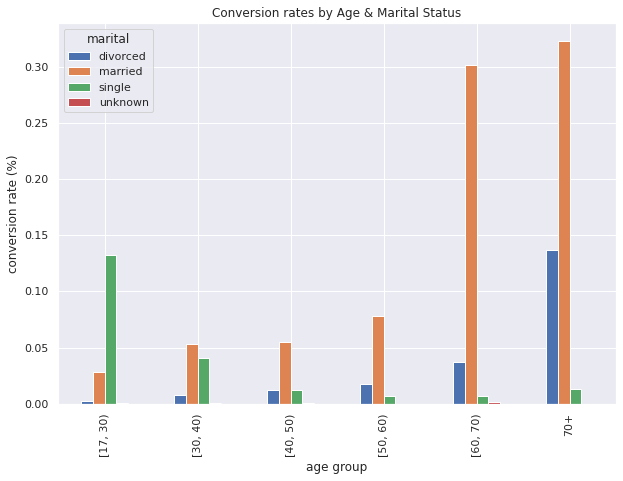

In [ ]:
ax = age_marital_df.loc[
    ['[17, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
    kind='bar', 
    grid=True,
    figsize=(10,7)
)

ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()

**Nhận xét:** Dưới 30 tuổi, nhóm khách hàng có tỷ lệ chuyển đôi cao là nhóm khách hàng single. Trong khi trên 30 tuổi, nhóm khách hàng có tỷ lệ chuyển đổi cao thì đa số là đã kết hôn, đặc biệt là từ trên 60 tuổi.

## Duration và Job

Text(0.5, 1.0, 'log(Duration) vs Education')

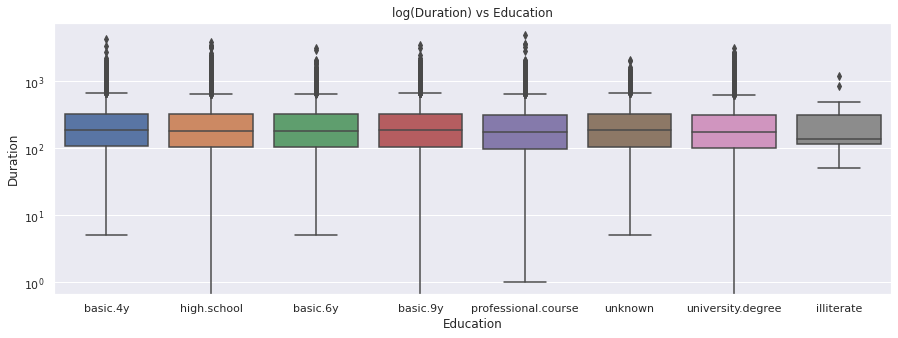

In [ ]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.boxplot(x = "education", y = "duration", data = df, orient = 'v')
ax.set_xlabel("Education")
ax.set_ylabel("Duration")
ax.set_yscale("log")
ax.set_title("log(Duration) vs Education")

**Nhận xét:** Với những khách hàng illiterate ( mù chữ ?) có độ dài cuộc gọi ngắn hơn các ngành nghề khác.

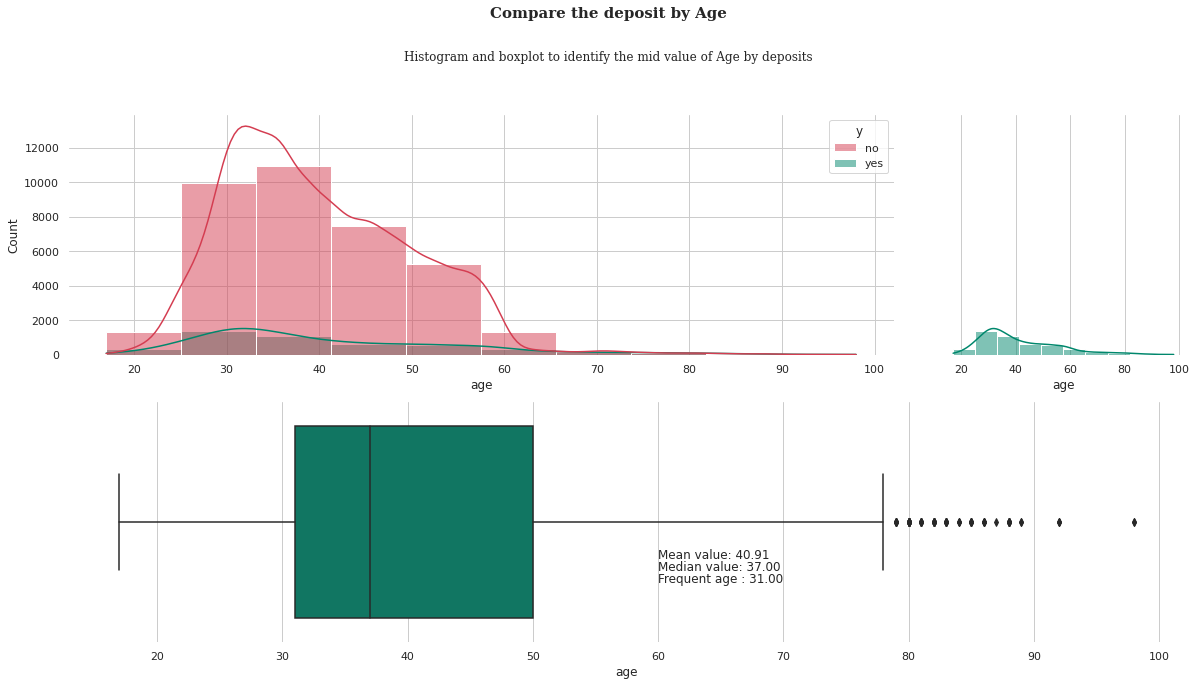

In [ ]:
fig=plt.figure(figsize=(20,15), facecolor=(0.2,0.0,0.0,0.0), edgecolor='black')
plt.suptitle("Compare the deposit by Age", family='Serif', size=15,weight='bold')

plt.figtext(0.5,0.93,"Histogram and boxplot to identify the mid value of Age by deposits", family='Serif', size=12, ha='center')
gs = GridSpec(nrows=3, ncols=4, figure=fig)
ax1=plt.subplot(gs[0,:3])


sns.histplot(data=df, x='age', bins=10, ax=ax1, kde=True, hue='y', multiple='layer', element='bars', palette=['#d43d51','#00876c']);
ax2=plt.subplot(gs[0,3:4], sharey=ax1)
sns.histplot(data=df[df['y']=='yes'], x='age', bins=10, ax=ax2, kde=True, color=['#00876c']);
ax2.yaxis.set_visible(False)



ax4=plt.subplot(gs[1,:4])
sns.boxplot(data=df[df['y']=='yes'], x='age', ax=ax4, palette=['#00876c']);
ax4.yaxis.set_visible(False)
ax4.text(60,0.15,"Mean value: {:.2f}".format(df[df['y']=='yes']['age'].mean()))
ax4.text(60,0.20,"Median value: {:.2f}".format(df[df['y']=='yes']['age'].median()))
ax4.text(60,0.25,"Frequent age : {:.2f}".format(df[df['y']=='yes']['age'].mode().max()))
for i in ['left','right','bottom','top']:
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)


**Nhận xét:** Tiền gửi bắt đầu ở độ tuổi 18+ và cao nhất là từ 32-50. Tuổi gửi tiền thường xuyên là 31. 

In [ ]:
df2['conversion'] = df2['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [ ]:
df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,unknown,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,unknown,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,unknown,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,unknown,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,unknown,1.1,93.994,-36.4,4.857,5191.0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,unknown,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,unknown,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,unknown,-1.1,94.767,-50.8,1.028,4963.6,no,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,unknown,-1.1,94.767,-50.8,1.028,4963.6,yes,1
